# PCA and Eigen decomposition

## Steps

1. Generate bi-variate normal random numbers
2. Perform PCA on the bi-variate normal random numbers
3. Perform PCA step-by-step

## Generate bi-variate normal random numbers

Generate random numbers from the same multivariate normal distribution. Define $\mu$ and $\mathit{Cov}$, and generate $100$ random numbers.

Covariances of multivariate normal distributions, specified as a $d$-by-$d$ (here $d=2$) symmetric, positive semi-definite matrix $\mathit{Cov}$, the covariance matrix. The covariance matrix is diagonal, containing variances along the diagonal and the covariance off it.

In [14]:
mu = [2 3];
Cov = [1 1.5; 1.5 3]
rng('default')  % For reproducibility
R = mvnrnd(mu,Cov,100);


Cov =

    1.0000    1.5000
    1.5000    3.0000




Plot the random numbers.

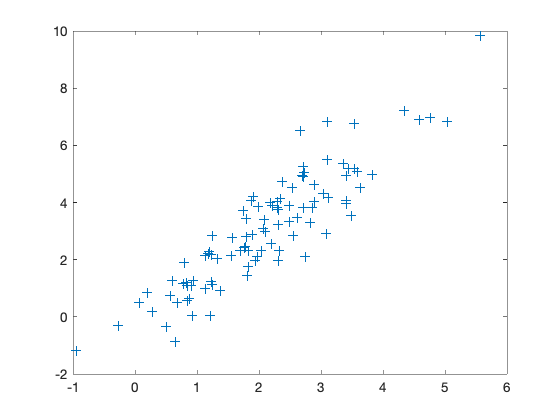

In [15]:
plot(R(:,1),R(:,2),'+');

Check sample variance and covariance of the generated data points and the sample correlation between the variables.

In [18]:
Sample_cov = cov(R)
Cor = corrcoef(R)


Sample_cov =

    1.3512    2.1031
    2.1031    4.0267


Cor =

    1.0000    0.9016
    0.9016    1.0000




Recall $\mathit{Var}(X)=\sigma_X^2$ and Pearson's coefficient of correlation $\mathit{Cor}(X, Y)=\frac{\mathit{Cov}(X, Y)}{\sigma_X \sigma_Y}=\frac{\mathit{Cov}(X, Y)}{\sqrt{\mathit{Var}(X)} \sqrt{\mathit{Var}(Y)}}$. 

In our example $\mathit{Cov}(X, Y)=2.1031$, $\mathit{Var}(X)=1.3512$, and $\mathit{Var}(Y)=4.0267$. As expected:

In [19]:
r = 2.1031/(sqrt(1.3512)*sqrt(4.0267))


r =

    0.9016




## Perform PCA on the bi-variate normal random numbers

In [23]:
[loading_vector,score,latent,tsquared,variablity_explained,mu] = pca(R); 
loading_vector
variablity_explained


loading_vector =

    0.4813    0.8766
    0.8766   -0.4813


variablity_explained =

   96.3473
    3.6527




Produce a biplot of the scores and loading vectors of the two principle components.

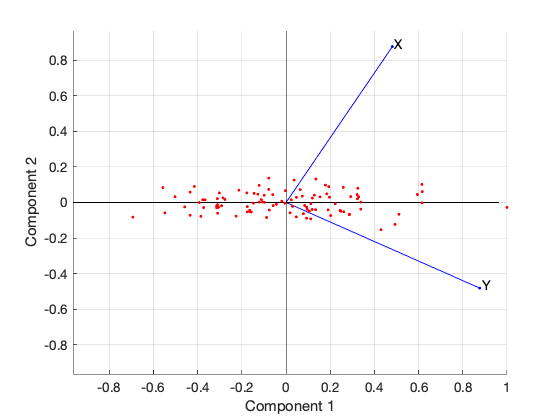

In [29]:
biplot(loading_vector,'scores',score,'varlabels',{'X','Y'});

## Perform PCA step-by-step

1. Center and Standardize, i.e., subtracting the mean of the data from the original dataset
2. Find the covariance matrix of the dataset
3. Find the eigenvectors associated with the greatest eigenvalues of the covariance matrix
4. Project the original dataset on the eigenvectors

### Standardize

Compute standard scores (commonly called $z$-scores) defined as $z_i=\frac{x_i-\mu_X}{\sigma_X}$.

In [31]:
data(:,1) = (R(:,1)-mean(R(:,1)))/sqrt(1.3512);
data(:,2) = (R(:,2)-mean(R(:,2)))/sqrt(4.0267);

### Find the covariance matrix 

As before. Check out the effect of standardization on the covariance matrix.

In [35]:
Cov = cov(data)


Cov =

    1.0000    0.9016
    0.9016    1.0000




### Find the eigenvectors and eigenvalues 

Recall the definition of eigenvectors $v$ and -values $\lambda$: $A v = \lambda v$, where $A$ is an $n$-by-$n$ matrix, $v$ is a column vector of length $n$, and $\lambda$ is a scalar.

In [37]:
[v, lambda] = eig(Cov)


V =

   -0.7071    0.7071
    0.7071    0.7071


lambda =

    0.0984         0
         0    1.9016




Mind that the second eigenvalue of $1.901$ is larger than the first eigenvalue of $0.0984$.

### Project the original dataset on the eigenvector(s)